### Importación de librerías a utilizar

In [79]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from functools import reduce

### Importación de datasets de Banco mundial de datos

In [71]:
# Se procesan todos los archivos csv origen
folder_path = "./Datos origen/Banco mundial/"

csv_files = [f for f in os.listdir(folder_path) if f.lower().endswith(".csv")]

dfs_world_bank=[]

# Lista de columnas de años
year_columns = set()

# Se itera sobre cada CSV detectado
for file in csv_files:
    # Lectura del CSV
    file_path = os.path.join(folder_path, file)
    df_world_bank = pd.read_csv(file_path)
    
    # Filtro sólo la fila para Argentina
    df_world_bank_arg = df_world_bank[df_world_bank['Country Name'] == 'Argentina'].copy()
    
    # Identifico columnas que sean años (se asume que son columnas que pueden convertirse a entero)
    current_years = [col for col in df_world_bank_arg.columns if col.isdigit()]

    # Agrego al conjunto de columnas de años
    year_columns.update(current_years)
    
    # Almaceno el DataFrame filtrado en la lista
    dfs_world_bank.append(df_world_bank_arg)

# Ordeno el conjunto de años en una lista ordenada
year_columns = sorted(list(year_columns), key=int)

# Uno columnas fijas y columnas variables (años)
fixed_columns = ["Country Name", "Indicator Name"]
full_columns = fixed_columns + year_columns

# Reindexo cada DataFrame para que tengan las mismas columnas
df_world_bank_reindexed = [df_world_bank.reindex(columns=full_columns) for df_world_bank in dfs_world_bank]

# Uno todos los DataFrames en uno solo
merged_df_world_bank = pd.concat(df_world_bank_reindexed, ignore_index=True)

# Formateo los N° flotantes para que mostrar el dataset y que los valores numéricos se vean con 2 decimales
pd.set_option('display.float_format', '{:.2f}'.format) 
merged_df_world_bank.head(2)


,Country Name,Indicator Name,1960,1961,1962,1963,1964,1965,1966,1967,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Argentina,"Computer, communications and other services (%...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,37.89,34.61,31.18,31.06,31.85,36.60,53.49,57.14,39.21,39.24
1,Argentina,Access to electricity (% of population),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,100.00,99.70,99.90,100.00,100.00,100.00,100.00,100.00,100.00,NaN


#### Inversión de filas y columnas
Para mayor practicidad se invierten las filas y columnas, dejando los indicadores como columnas y en las filas los años 

In [72]:

# Construyo un dataset de formato largo (cada fila tiene la combinación indicador/año)
df_long_world_bank = pd.melt(
    merged_df_world_bank,
    id_vars=["Country Name","Indicator Name"],
    var_name="Year",
    value_name="Value"
)

# Convierto la columna 'Year' a tipo numérico
df_long_world_bank["Year"] = df_long_world_bank["Year"].astype(int)

# Pivoteo el DataFrame 
df__world_bank_pivot = df_long_world_bank.pivot(index="Year", columns="Indicator Name", values="Value")

# Restablezco el índice para tener 'Year' como columna
df__world_bank_pivot = df__world_bank_pivot.reset_index()

df__world_bank_pivot

Indicator Name,Year,Access to electricity (% of population),"Computer, communications and other services (% of commercial service imports)",Fixed broadband subscriptions,GDP (current US$),GDP per capita (current US$),GNI (current US$),Individuals using the Internet (% of population),Mobile cellular subscriptions,"Population, female","Population, male",Secure Internet servers,Urban population (% of total population)
0,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,10175528.00,10210517.00,NaN,73.61
1,1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10357370.00,10368906.00,NaN,74.22
2,1962,NaN,NaN,NaN,24450604877.61,1160.31,25083407626.94,NaN,NaN,10539647.00,10532891.00,NaN,74.77
3,1963,NaN,NaN,NaN,18272123664.47,852.97,18744951947.77,NaN,NaN,10723652.00,10698053.00,NaN,75.31
4,1964,NaN,NaN,NaN,25605249381.76,1176.20,26267861213.22,NaN,NaN,10907254.00,10862199.00,NaN,75.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,2019,100.00,36.60,8790000.00,447754683615.22,9955.97,430166792070.57,79.95,56400000.00,22665751.00,22307714.00,135647.00,91.99
60,2020,100.00,53.49,9570000.00,385740508436.97,8535.60,375344057341.93,85.51,54800000.00,22772481.00,22419484.00,167248.00,92.11
61,2021,100.00,57.14,10500000.00,486564085480.04,10738.02,476802271007.63,87.15,59100000.00,22834166.00,22478115.00,231834.00,92.23
62,2022,100.00,39.21,11200000.00,632790070063.12,13935.68,621165221747.64,88.38,59700000.00,22880775.00,22527129.00,240087.00,92.35


In [73]:
df__world_bank_pivot.describe()

Indicator Name,Year,Access to electricity (% of population),"Computer, communications and other services (% of commercial service imports)",Fixed broadband subscriptions,GDP (current US$),GDP per capita (current US$),GNI (current US$),Individuals using the Internet (% of population),Mobile cellular subscriptions,"Population, female","Population, male",Secure Internet servers,Urban population (% of total population)
count,64.00,33.00,48.00,23.00,62.00,62.00,62.00,34.00,52.00,64.00,64.00,14.00,64.00
mean,1991.50,96.93,27.83,5272652.17,226310816970.42,5868.08,220083918198.14,34.84,21032312.92,16822311.55,16448220.64,87678.00,85.61
std,18.62,2.64,9.95,3741168.98,194524890205.93,4191.38,190001419040.36,33.29,26977295.85,4026172.47,3915897.91,98033.03,5.60
min,1960.00,92.15,13.92,94000.00,18272123664.47,852.97,18744951947.77,0.00,0.00,10175528.00,10210517.00,1028.00,73.61
25%,1975.75,94.82,18.76,2090000.00,70048441049.35,2408.92,69022847256.43,1.44,0.00,13253302.25,12926936.75,3297.00,81.27
50%,1991.50,97.00,28.09,5150000.00,153005280299.76,4278.68,140755932664.04,23.44,2339967.50,16986423.50,16475487.00,51885.50,87.44
75%,2007.25,99.70,34.81,8155000.00,324469425933.21,8201.80,314943796194.23,67.21,55200000.00,20315963.75,19802645.50,159347.75,90.41
max,2023.00,100.00,57.14,11500000.00,646075277525.12,14532.50,632729881149.35,89.23,67400000.00,22941417.00,22596984.00,248239.00,92.46


#### Agregado de nueva columna calculada

In [74]:
# Se agrega columna de cantidad nominal de personas usando internet (% de personas usando internet * población argentina)
df__world_bank_pivot['Internet Users'] = (df__world_bank_pivot['Individuals using the Internet (% of population)'] / 100) * (df__world_bank_pivot['Population, female'] + df__world_bank_pivot['Population, male'])
df__world_bank_pivot.tail(2)


Indicator Name,Year,Access to electricity (% of population),"Computer, communications and other services (% of commercial service imports)",Fixed broadband subscriptions,GDP (current US$),GDP per capita (current US$),GNI (current US$),Individuals using the Internet (% of population),Mobile cellular subscriptions,"Population, female","Population, male",Secure Internet servers,Urban population (% of total population),Internet Users
62,2022,100.00,39.21,11200000.00,632790070063.12,13935.68,621165221747.64,88.38,59700000.00,22880775.00,22527129.00,240087.00,92.35,40129416.79
63,2023,NaN,39.24,11500000.00,646075277525.12,14187.48,632729881149.35,89.23,62700000.00,22941417.00,22596984.00,248239.00,92.46,40633459.83


### Importación de datasets de ENACOM

In [ ]:
# Ruta de CSVs
csv_files = glob.glob('./Datos origen/ENACOM/*.csv')

lista_dfs_enacom = []

# Itero sobre cada archivo
for file in csv_files:
    df_enacom_temp = pd.read_csv(file)

    # Elimino la columna 'Total' si existe
    if 'Total' in df_enacom_temp.columns:
        df_enacom_temp = df_enacom_temp.drop(columns=['Total'])
    lista_dfs_enacom.append(df_enacom_temp)

# Fusiono todos los DataFrames usando las columnas Año, Trimestre y Provincia
df_enacom = reduce(lambda left, right: pd.merge(left, right, on=['Año', 'Trimestre', 'Provincia'], how='outer'), lista_dfs_enacom)

df_enacom

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra Optica,Wireless,Otras Tecnologías,Hasta 512 kbps,+ 512 Kbps - 1 Mbps,...,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,Otras velocidades,Banda Ancha Fija,Dial Up,Accesos cada 100 Hogares,Accesos cada 100 Habitantes,Mbps (Media de bajada)
0,2024,3,Buenos Aires,222003,2689425,1895514,144449,73496,26909.00,23962.00,...,239339.00,246144.00,110876.00,4042646.00,93351.00,5018987,5900,NaN,NaN,"160,00"
1,2024,3,Capital Federal,52604,1116716,254994,4493,30648,516.00,4544.00,...,48083.00,33925.00,5829.00,1355061.00,0.00,1457405,2050,NaN,NaN,"236,92"
2,2024,3,Catamarca,4646,10053,59975,1384,890,71.00,209.00,...,3734.00,4423.00,1827.00,61181.00,77.00,76947,1,NaN,NaN,"103,20"
3,2024,3,Chaco,8366,57194,85610,8548,2649,236.00,477.00,...,10361.00,6247.00,5729.00,105485.00,4040.00,162362,5,NaN,NaN,"109,01"
4,2024,3,Chubut,25955,80405,26555,31118,11776,111.00,1088.00,...,31402.00,22843.00,20196.00,33665.00,16589.00,174952,857,NaN,NaN,"26,20"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,2014,1,Santiago Del Estero,32567,3598,19,915,34,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,37124,9,NaN,NaN,"2,95"
2012,2014,1,Tierra Del Fuego,21618,2837,648,1,2934,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,27272,766,NaN,NaN,"3,45"
2013,2014,1,Tierra Del Fuego,21618,2837,648,1,2934,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,27272,766,NaN,NaN,"3,45"
2014,2014,1,Tucumán,129717,83,121,13,98,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,129944,88,NaN,NaN,"3,21"


#### Transformo las columnas numéricas con separador decimal ','

In [91]:
cols = ["Accesos cada 100 Hogares", "Accesos cada 100 Habitantes", "Mbps (Media de bajada)"]

for col in cols:
    df_enacom[col] = df_enacom[col].astype(str).str.replace(',', '.').astype(float)

df_enacom.head(2)

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra Optica,Wireless,Otras Tecnologías,Hasta 512 kbps,+ 512 Kbps - 1 Mbps,...,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,Otras velocidades,Banda Ancha Fija,Dial Up,Accesos cada 100 Hogares,Accesos cada 100 Habitantes,Mbps (Media de bajada)
0,2024,3,Buenos Aires,222003,2689425,1895514,144449,73496,26909.00,23962.00,...,239339.00,246144.00,110876.00,4042646.00,93351.00,5018987,5900,NaN,NaN,160.00
1,2024,3,Capital Federal,52604,1116716,254994,4493,30648,516.00,4544.00,...,48083.00,33925.00,5829.00,1355061.00,0.00,1457405,2050,NaN,NaN,236.92


## Análisis de datos

### Datos Banco Mundial

#### Coeficiente de Pearson

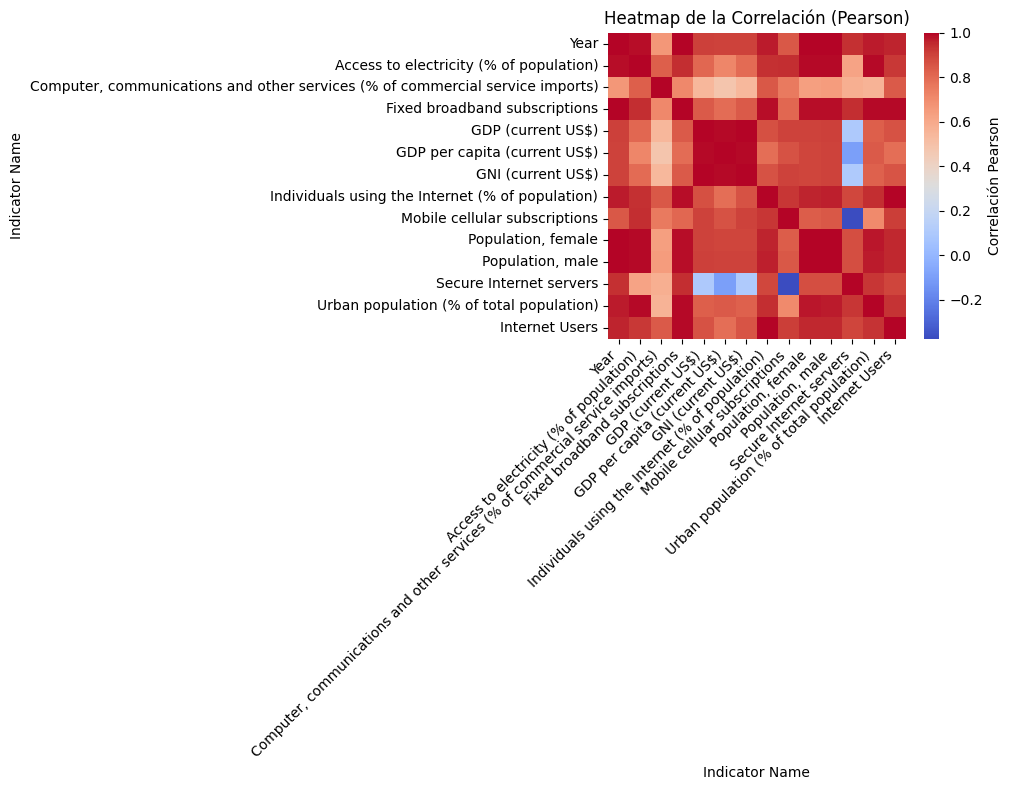

In [92]:
pearson_corr = df__world_bank_pivot.corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(
    pearson_corr,
    cmap='coolwarm',
    annot=False,
    fmt='.2f',
    cbar_kws={'label': 'Correlación Pearson'}
)
plt.title("Heatmap de la Correlación (Pearson)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

#### Coeficiente de Spearman

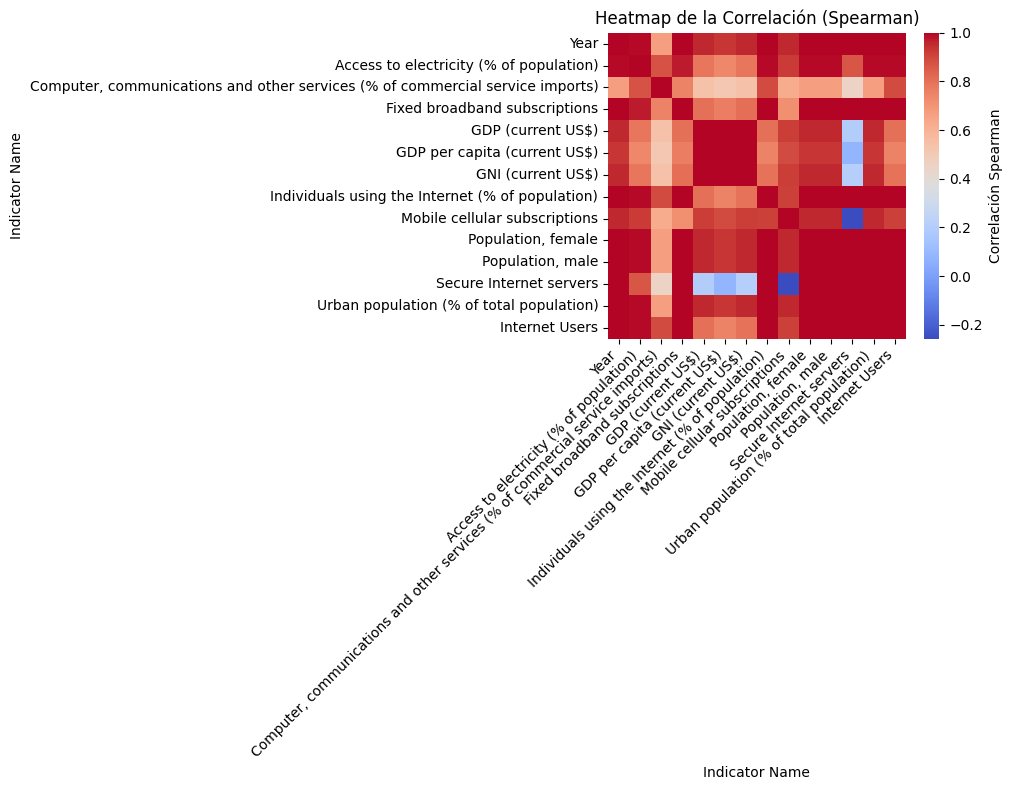

In [93]:
spearman_corr = df__world_bank_pivot.corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(
    spearman_corr,
    cmap='coolwarm',
    annot=False,
    fmt='.2f',
    cbar_kws={'label': 'Correlación Spearman'}
)
plt.title("Heatmap de la Correlación (Spearman)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### Datos ENACOM

#### Coeficiente de Pearson

C:\Users\leoca\AppData\Local\Temp\ipykernel_11228\1777596426.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pearson_corr = df_enacom.corr(method='pearson')


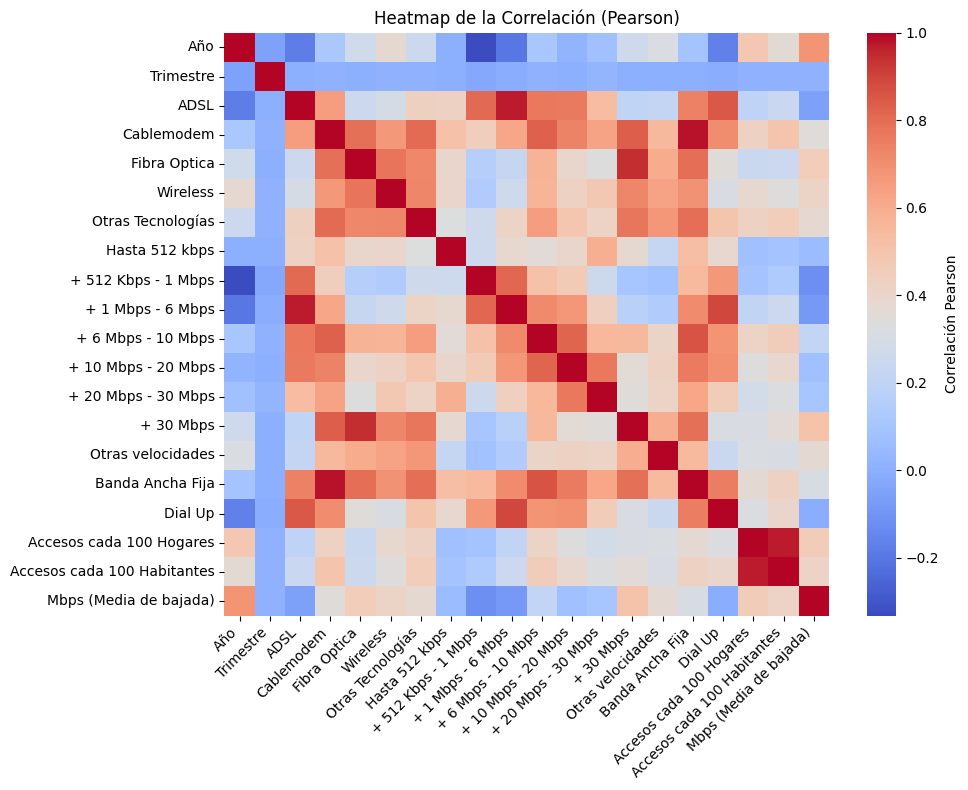

In [94]:
pearson_corr = df_enacom.corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(
    pearson_corr,
    cmap='coolwarm',
    annot=False,
    fmt='.2f',
    cbar_kws={'label': 'Correlación Pearson'}
)
plt.title("Heatmap de la Correlación (Pearson)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

#### Coeficiente de Spearman

C:\Users\leoca\AppData\Local\Temp\ipykernel_11228\955604045.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  spearman_corr = df_enacom.corr(method='spearman')


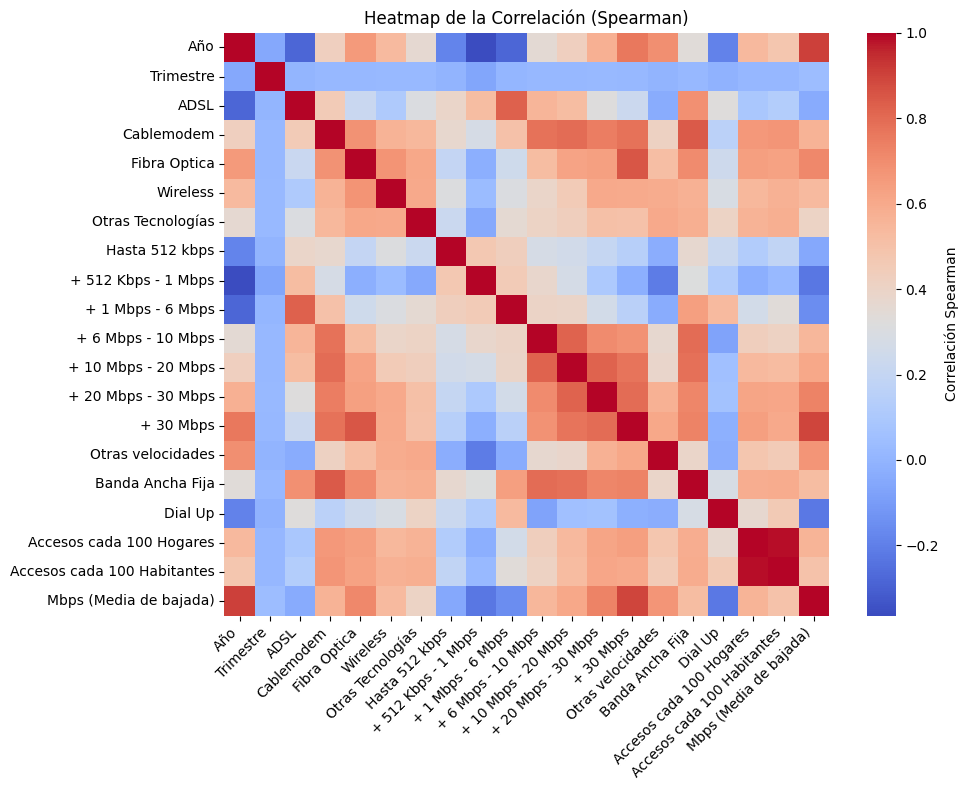

In [95]:
spearman_corr = df_enacom.corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(
    spearman_corr,
    cmap='coolwarm',
    annot=False,
    fmt='.2f',
    cbar_kws={'label': 'Correlación Spearman'}
)
plt.title("Heatmap de la Correlación (Spearman)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## Exporto los datasets a CSV

In [96]:
df__world_bank_pivot.to_csv("world_bank_data.csv",  sep=';', decimal=',',index=False)
df_enacom.to_csv("enacom_data.csv",  sep=';', decimal=',',index=False)